In [1]:
# Importing the required libs

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
med_df = pd.read_csv("medical_exam.txt")
med_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   sex          70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


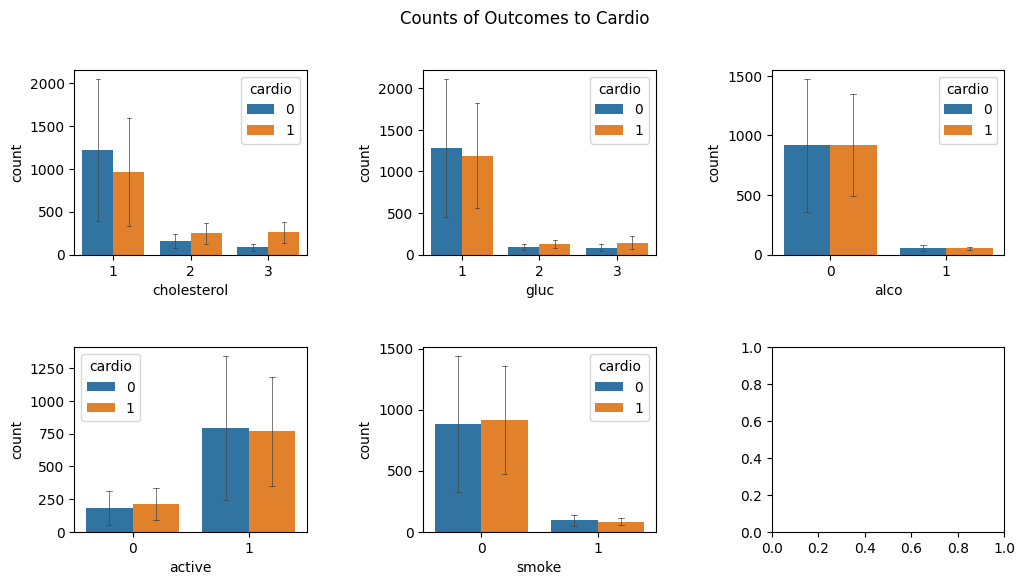

<Figure size 640x480 with 0 Axes>

In [3]:
# Creating counts of certain varaibles based on the outcome.

rows = med_df.groupby(["cholesterol","gluc","alco","active","smoke"])["cardio"].value_counts().reset_index()
fig,ax = plt.subplots(2,3,figsize=(12,6))
sns.barplot(ax=ax[0,0],data=rows,x="cholesterol",y="count",hue=("cardio"),errorbar=("se",1),capsize=0.1,err_kws={"linewidth":0.5})
sns.barplot(ax=ax[0,1],data=rows,x="gluc",y="count",hue=("cardio"),errorbar=("se",1),capsize=0.1,err_kws={"linewidth":0.5})
sns.barplot(ax=ax[0,2],data=rows,x="alco",y="count",hue=("cardio"),errorbar=("se",1),capsize=0.1,err_kws={"linewidth":0.5})
sns.barplot(ax=ax[1,0],data=rows,x="active",y="count",hue=("cardio"),errorbar=("se",1),capsize=0.1,err_kws={"linewidth":0.5})
sns.barplot(ax=ax[1,1],data=rows,x="smoke",y="count",hue=("cardio"),errorbar=("se",1),capsize=0.1,err_kws={"linewidth":0.5})
fig.subplots_adjust(wspace=0.5,hspace=0.5)
fig.suptitle("Counts of Outcomes to Cardio")
plt.show()
plt.clf()

#### Observations: 
As we can see the cholesterol and glucose outcomes from the chart above, exercise has become a component for those with higher levels of cholesterol and glucose. The need for exercise seems to be dependent on the seriousness of these "levels".

In [4]:
# Adding overweight column to the dataset.
bmi_cutoff = 25.0
#Calculating the BMI
def calculate_bmi():
    height_in_metres_sq = med_df["height"].apply(lambda x: (x*0.01)**2)
    calc_bmi = med_df["weight"]/height_in_metres_sq
    overweight = [0 if val < bmi_cutoff else 1 for val in calc_bmi.values]
    return overweight
# Calling the function        
med_df["overweight"] = calculate_bmi()

# Normalising the data by Cholesterol and Glucose
med_df["overweight"] = np.where((med_df["cholesterol"]>1) | (med_df["gluc"]>1),1,0)
med_df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,0
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,1


<Figure size 1500x600 with 0 Axes>

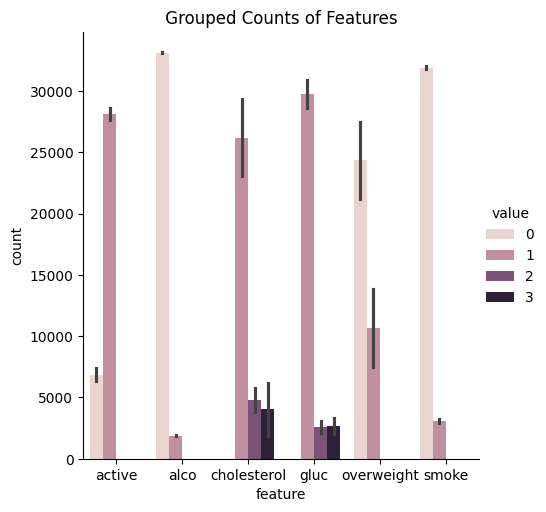

<Figure size 640x480 with 0 Axes>

In [5]:
def draw_cat_plot():
    df_cat = pd.melt(med_df,id_vars=["cardio"],value_vars=["cholesterol", "gluc", "smoke", "alco", "active", "overweight"]
                    ,var_name="feature",value_name="value")
    df_cat_reformatted = df_cat.groupby(["cardio","feature"])["value"].value_counts().reset_index(name="count")
    plt.figure(figsize=(15,6))
    fig = sns.catplot(data=df_cat_reformatted,x="feature",y="count",hue="value",kind="bar",errorbar=("se",1))
    plt.title(" Grouped Counts of Features ")
    plt.show(fig)
    plt.clf()
    
draw_cat_plot()


In [6]:
# Cleaning data
def clean_data():
    # Diastolic pressure is higher than systolic pressure
    pressure_data = med_df.loc[med_df["ap_lo"]<=med_df["ap_hi"]]
    # height is less than the 2.5th percentile
    height_less_than = pressure_data.loc[pressure_data["height"]>=pressure_data["height"].quantile(0.025)]
    # height is more than the 97.5th percentile
    height_more_than = height_less_than.loc[height_less_than["height"]<=height_less_than["height"].quantile(0.975)]
    # weight is less than the 2.5th percentile
    weight_less_than = height_more_than.loc[height_more_than["weight"]>=height_more_than["weight"].quantile(0.025)]
    # weight is more than the 97.5th percentile
    weight_more_than = weight_less_than.loc[weight_less_than["weight"]<=weight_less_than["weight"].quantile(0.975)]
    return weight_more_than

filtered_df = clean_data()


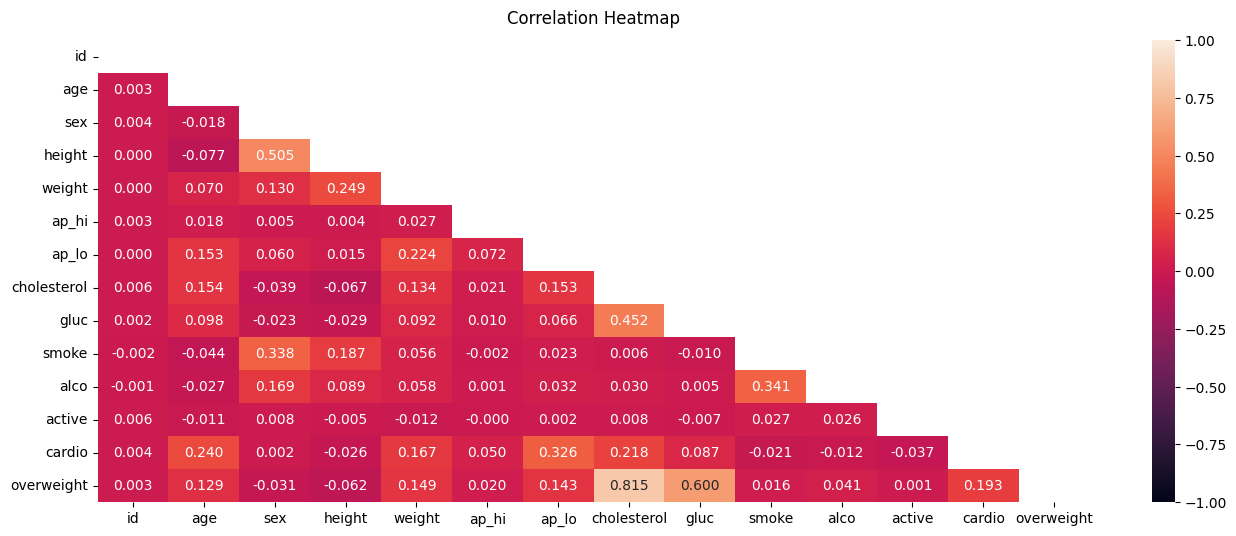

<Figure size 640x480 with 0 Axes>

In [19]:
corr_matrix = filtered_df.corr()
mask = np.triu(np.ones_like(corr_matrix,np.dtype(dtype=bool)))
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(data=corr_matrix,mask=mask,vmin=-1,vmax=1,fmt=".3f",annot=True)
heatmap.set_title("Correlation Heatmap",fontdict={"fontsize":12},pad=12)
plt.show()
plt.clf()

### Observations:
In the chart above we can start seeing some more correlations in this dataset. We are seeing some form of association with cholesterol, glucose and cardio. Higher diastolic and systolic blood pressure and weight seem to have an assocaition as well. We can start to stipulate that as the overall health markups increase we can see an increase in cardio/active lifestyle. 

Some other markers are the dataset seems to be associating higher numbers of smokers and alcaholic drinkers. We can also see a relationship between height and sex. 